/home/jhenrique/myenv/lib/python3.11/site-packages/pysd/py_backend/model.py:1562: UserWarning: Replacing the equation of stock 'Teacup Temperature' with params...
  self.set_components(params)
/home/jhenrique/myenv/lib/python3.11/site-packages/pysd/py_backend/model.py:1562: UserWarning: Replacing the equation of stock 'Teacup Temperature' with params...
  self.set_components(params)
/home/jhenrique/myenv/lib/python3.11/site-packages/pysd/py_backend/model.py:1562: UserWarning: Replacing the equation of stock 'Teacup Temperature' with params...
  self.set_components(params)


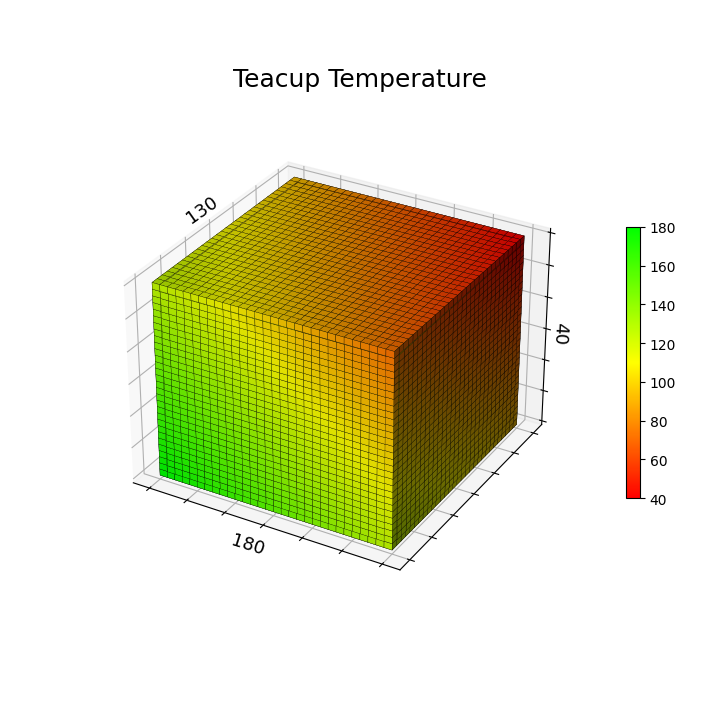

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pysd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import pandas as pd

N_BINS = 256

# Load model data
variable_to_plot = 'Teacup Temperature'
csv_values = pd.read_csv('test.csv')
initial_values =  csv_values['Valores var 1'].to_list()
path_model = pysd.read_vensim("../../System Dynamics/Jupyter/PySD-Cookbook-master/source/models/Teacup/Teacup.mdl")

def get_values(variable, initial_values, path_model):
    values = []
    for initial_value in initial_values:
        model = path_model
        res = model.run(params={variable: initial_value}, return_columns=[variable_to_plot])
        values.append(res[variable_to_plot].iloc[-1])
    return values

def map_value_to_color(value):
    """Map a normalized value to a color."""
    if value <= 0.4:
        return (1, 0, 0)  # Red
    elif value <= 0.7:
        return (1, 1, 0)  # Yellow
    else:
        return (0, 1, 0)  # Green

# Run the model to get final values
answers_values = get_values(variable_to_plot, initial_values, path_model)

# Determine minimum and maximum values for normalization
min_value, max_value = min(answers_values), max(answers_values)

# Create the custom colormap
colors = []
for value in answers_values:
    normalized_value = (value - min_value) / (max_value - min_value)
    colors.append(map_value_to_color(normalized_value))

cmap_name = "custom_graduated_heatmap"
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=N_BINS)

# Plotting configuration
axes = [30, 30, 30]
data = np.ones(axes, dtype=np.float32)
x, y, z = np.meshgrid(np.linspace(0, 3, axes[0]),
                      np.linspace(0, 5, axes[1]),
                      np.linspace(0, 5, axes[2]))
heatmap_data = x + y + z
heatmap_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
colors = custom_cmap(heatmap_normalized)

# 3D Plotting
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
voxels = ax.voxels(data, facecolors=colors, alpha=1, edgecolor='k', linewidth=0.2)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# 2D Plotting
ax2d = fig.add_axes([0, 0, 1, 1], frameon=False)
ax2d.set_xticks([])
ax2d.set_yticks([])
ax2d.text(0.5, 0.9, f'{variable_to_plot}', fontsize=18, fontweight='normal', ha='center', va='center')
ax2d.text(0.34, 0.215, f'{initial_values[0]}', ha="center", va="bottom", fontsize=13, rotation=-17.65)
ax2d.text(0.275, 0.69, f'{initial_values[1]}', ha="center", va="bottom", fontsize=13, rotation=35)
ax2d.text(0.785, 0.5205, f'{initial_values[2]}', ha="center", va="bottom", fontsize=13, rotation=267.2)

# Add Colorbar
sm = cm.ScalarMappable(cmap=custom_cmap.reversed(), norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.1)

plt.show()